# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('../assets/billboard.csv')
data


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Create a data dictionary for the data set. (ie: describe the variables of your dataset)

Field Name          Description

Year                The year the song was released
Artist              The artist who created the song
Track               The title of the song
Time                The length of the song in seconds
Genre               The category of music that this song falls under
Date_entered        The date this song entered the Billboard Top 100
Date_peaked         The date this song reached its highest ranking on the Billboard Top 100
Position            The ranking of the song in the Top 100
Week                The week corresponding to the ranking or 'Position'
1st_Week to 65th_Week   The columns that contain the ranking




##### Write a brief description of your data, and any interesting observations you've made thus far. 

-The data contains a lot of NaN values in the weeks columns, I will need to remove these in order to graph the data
-The titles seems to contain extraneous characters
-The there are columns with data types that aren't very fitting (example:time of the song is a string)
-Will need to do significant cleaning of the data

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. 

In [4]:

#The below for loop removes all columns where the column doesn't contain any data
col_val = data.columns.values

for i in col_val:
    if pd.isnull(np.max(data[i])):
        del data[i]

#The below map function removes x's and .'s from the column names        
data.columns = map(lambda x: x.replace('x',''),data.columns)
data.columns = map(lambda x: x.replace('.','_'),data.columns)

print col_val

['year' 'artist.inverted' 'track' 'time' 'genre' 'date.entered'
 'date.peaked' 'x1st.week' 'x2nd.week' 'x3rd.week' 'x4th.week' 'x5th.week'
 'x6th.week' 'x7th.week' 'x8th.week' 'x9th.week' 'x10th.week' 'x11th.week'
 'x12th.week' 'x13th.wek' 'x14th.week' 'x15th.week' 'x16th.week'
 'x17th.week' 'x18th.week' 'x19th.week' 'x20th.week' 'x21st.week'
 'x22nd.week' 'x23rd.week' 'x24th.week' 'x25th.week' 'x26th.week'
 'x27th.week' 'x28th.week' 'x29th.week' 'x30th.week' 'x31st.week'
 'x32nd.week' 'x33rd.week' 'x34th.week' 'x35th.week' 'x36th.week'
 'x37th.week' 'x38th.week' 'x39th.week' 'x40th.week' 'x41st.week'
 'x42nd.week' 'x43rd.week' 'x44th.week' 'x45th.week' 'x46th.week'
 'x47th.week' 'x48th.week' 'x49th.week' 'x50th.week' 'x51st.week'
 'x52nd.week' 'x53rd.week' 'x54th.week' 'x55th.week' 'x56th.week'
 'x57th.week' 'x58th.week' 'x59th.week' 'x60th.week' 'x61st.week'
 'x62nd.week' 'x63rd.week' 'x64th.week' 'x65th.week' 'x66th.week'
 'x67th.week' 'x68th.week' 'x69th.week' 'x70th.week' 'x71st.w

In [5]:
#The below code converts the strings in the time 
times = map(lambda x: x.replace(':',''),data['time'])
new_times = []
for string1 in times:
    total_sec = (int(string1[0]) * 60) + (int(string1[1])*10) + int(string1[2])
    new_times.append(float(total_sec))


In [6]:
data['time'] = pd.Series(new_times)


data = data.rename(columns = {'artist_inverted':'artist'})
data = data.rename(columns = {'13th_wek':'13th_week'})

In [7]:
data['date_entered']  = pd.to_datetime(data['date_entered'])
data['date_peaked'] = pd.to_datetime(data['date_entered'])



In [8]:
data['1st_week'] = data['1st_week'].map(lambda x: float(x))

,year,artist,track,time,genre,date_entered,date_peaked,1st_week,2nd_week,3rd_week,...,56th_week,57th_week,58th_week,59th_week,60th_week,61st_week,62nd_week,63rd_week,64th_week,65th_week
0,2000,Destiny's Child,Independent Women Part I,218.0,Rock,2000-09-23,2000-09-23,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",258.0,Rock,2000-02-12,2000-02-12,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,247.0,Rock,1999-10-23,1999-10-23,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,225.0,Rock,2000-08-12,2000-08-12,41.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218.0,Rock,2000-08-05,2000-08-05,57.0,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,257.0,Rock,2000-06-17,2000-06-17,59.0,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,271.0,Rock,1999-12-25,1999-12-25,83.0,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,216.0,Latin,2000-04-01,2000-04-01,63.0,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,232.0,Rock,2000-06-24,2000-06-24,77.0,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,265.0,Country,1999-06-05,1999-06-05,81.0,54.0,44.0,...,25.0,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [10]:
print data.shape
data.info()


(317, 72)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 72 columns):
year            317 non-null int64
artist          317 non-null object
track           317 non-null object
time            317 non-null float64
genre           317 non-null object
date_entered    317 non-null datetime64[ns]
date_peaked     317 non-null datetime64[ns]
1st_week        317 non-null float64
2nd_week        312 non-null float64
3rd_week        307 non-null float64
4th_week        300 non-null float64
5th_week        292 non-null float64
6th_week        280 non-null float64
7th_week        269 non-null float64
8th_week        260 non-null float64
9th_week        253 non-null float64
10th_week       244 non-null float64
11th_week       236 non-null float64
12th_week       222 non-null float64
13th_week       210 non-null float64
14th_week       204 non-null float64
15th_week       197 non-null float64
16th_week       182 non-null float64
17th_week       177 non-n

In [11]:
data_long = pd.melt(data,
                    id_vars = ['year','artist','track','time','genre','date_entered','date_peaked'],
                    value_vars = None,
                    var_name = 'Weeks',
                    value_name = 'Position'
                   )

data_long

,year,artist,track,time,genre,date_entered,date_peaked,Weeks,Position
0,2000,Destiny's Child,Independent Women Part I,218.0,Rock,2000-09-23,2000-09-23,1st_week,78.0
1,2000,Santana,"Maria, Maria",258.0,Rock,2000-02-12,2000-02-12,1st_week,15.0
2,2000,Savage Garden,I Knew I Loved You,247.0,Rock,1999-10-23,1999-10-23,1st_week,71.0
3,2000,Madonna,Music,225.0,Rock,2000-08-12,2000-08-12,1st_week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218.0,Rock,2000-08-05,2000-08-05,1st_week,57.0
5,2000,Janet,Doesn't Really Matter,257.0,Rock,2000-06-17,2000-06-17,1st_week,59.0
6,2000,Destiny's Child,Say My Name,271.0,Rock,1999-12-25,1999-12-25,1st_week,83.0
7,2000,"Iglesias, Enrique",Be With You,216.0,Latin,2000-04-01,2000-04-01,1st_week,63.0
8,2000,Sisqo,Incomplete,232.0,Rock,2000-06-24,2000-06-24,1st_week,77.0
9,2000,Lonestar,Amazed,265.0,Country,1999-06-05,1999-06-05,1st_week,81.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [12]:
mask = np.isnan(data_long['Position'])
data_nan = data_long[~mask]
data_nan

,year,artist,track,time,genre,date_entered,date_peaked,Weeks,Position
0,2000,Destiny's Child,Independent Women Part I,218.0,Rock,2000-09-23,2000-09-23,1st_week,78.0
1,2000,Santana,"Maria, Maria",258.0,Rock,2000-02-12,2000-02-12,1st_week,15.0
2,2000,Savage Garden,I Knew I Loved You,247.0,Rock,1999-10-23,1999-10-23,1st_week,71.0
3,2000,Madonna,Music,225.0,Rock,2000-08-12,2000-08-12,1st_week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218.0,Rock,2000-08-05,2000-08-05,1st_week,57.0
5,2000,Janet,Doesn't Really Matter,257.0,Rock,2000-06-17,2000-06-17,1st_week,59.0
6,2000,Destiny's Child,Say My Name,271.0,Rock,1999-12-25,1999-12-25,1st_week,83.0
7,2000,"Iglesias, Enrique",Be With You,216.0,Latin,2000-04-01,2000-04-01,1st_week,63.0
8,2000,Sisqo,Incomplete,232.0,Rock,2000-06-24,2000-06-24,1st_week,77.0
9,2000,Lonestar,Amazed,265.0,Country,1999-06-05,1999-06-05,1st_week,81.0


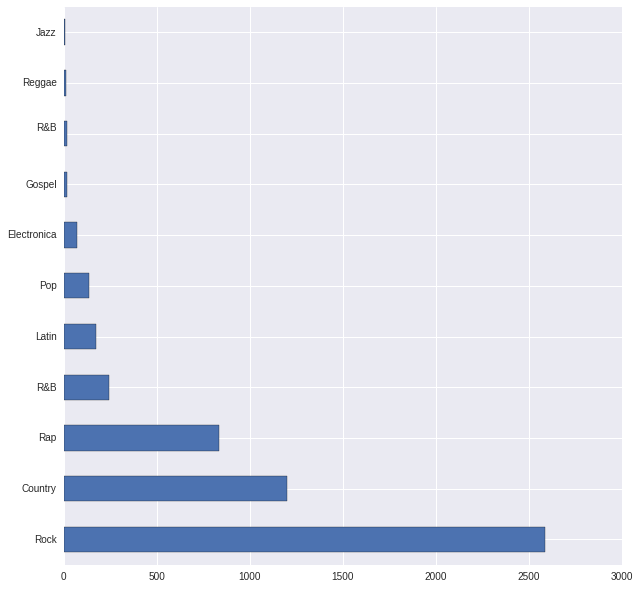

In [13]:
sns.set(rc={"figure.figsize": (10, 10)})
data_nan.genre.value_counts().plot("barh")

In [14]:
data_nan['Weeks'] = pd.Categorical(data_nan.Weeks,data_nan.Weeks.unique())

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


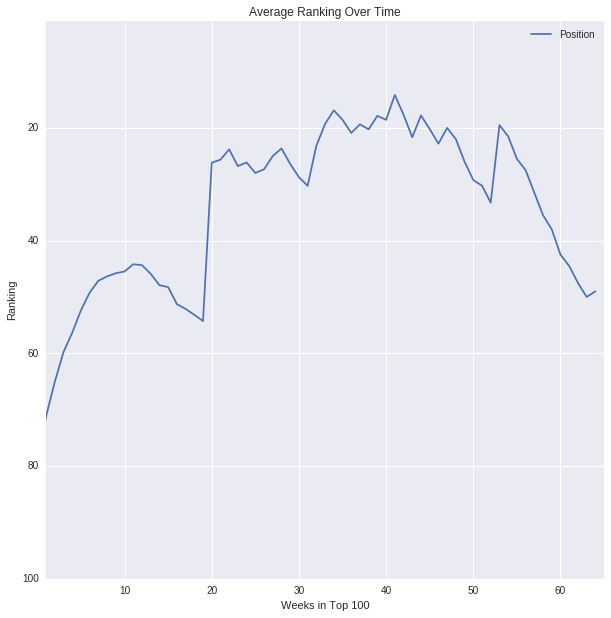

In [20]:
data_nan.groupby('Weeks').Position.mean().reset_index().sort_values('Weeks').plot()

axes=plt.gca()
axes.set_ylim([100,1])
axes.set_xlim([1,65])
axes.set_xlabel('Weeks in Top 100')
axes.set_ylabel('Ranking')
axes.set_title('Average Ranking Over Time')


In [49]:
print data_nan.groupby(['track']).count().sort('Weeks').head()
print data_nan.groupby(['track']).count().sort('Weeks').tail()

                       year  artist  time  genre  date_entered  date_peaked  \
track                                                                         
Souljas                   1       1     1      1             1            1   
Toca's Miracle            1       1     1      1             1            1   
No Me Dejes De Querer     1       1     1      1             1            1   
Cherchez LaGhost          1       1     1      1             1            1   
Imagine That              2       2     2      2             2            2   

                       Weeks  Position  
track                                   
Souljas                    1         1  
Toca's Miracle             1         1  
No Me Dejes De Querer      1         1  
Cherchez LaGhost           1         1  
Imagine That               2         2  
                     year  artist  time  genre  date_entered  date_peaked  \
track                                                                       
With 

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

My Problem Statement: Billboard songs will reach their peak, on average, between 5 and 10 weeks after their enterance to the billboard Top 100.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

-I can take the top 10 songs and bottom ten songs and compare
-I can rank the songs in terms of overall popularity and take the mode (middle song) and check when it reached its peak
-I can take the mean song rank of each week and then graph this relationship.  The highest point on the graph with represent when, on average most songs peak.

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for roughly 800-1,000 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 600 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 